<a href="https://colab.research.google.com/github/ZAINABALBALUSHI/Mining-and-Predictive-Analytics/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [52]:
# Load datasets
train_df = pd.read_csv(io.BytesIO(data['train.csv']))
test_df = pd.read_csv(io.BytesIO(data['test.csv']))


In [53]:
# Inspect datasets
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)
print("Train Dataset Info:\n", train_df.info())
print("Test Dataset Info:\n", test_df.info())

# View the first few rows
print("Train Dataset Preview:\n", train_df.head())
print("Test Dataset Preview:\n", test_df.head())


Train Dataset Shape: (1460, 81)
Test Dataset Shape: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   ob

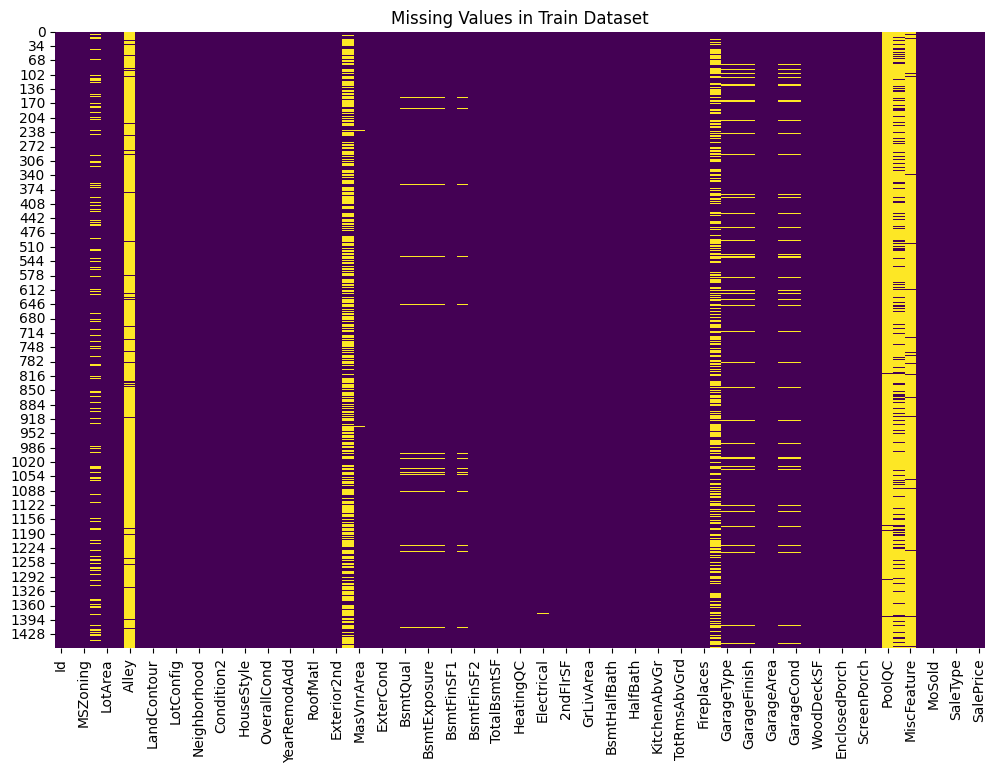

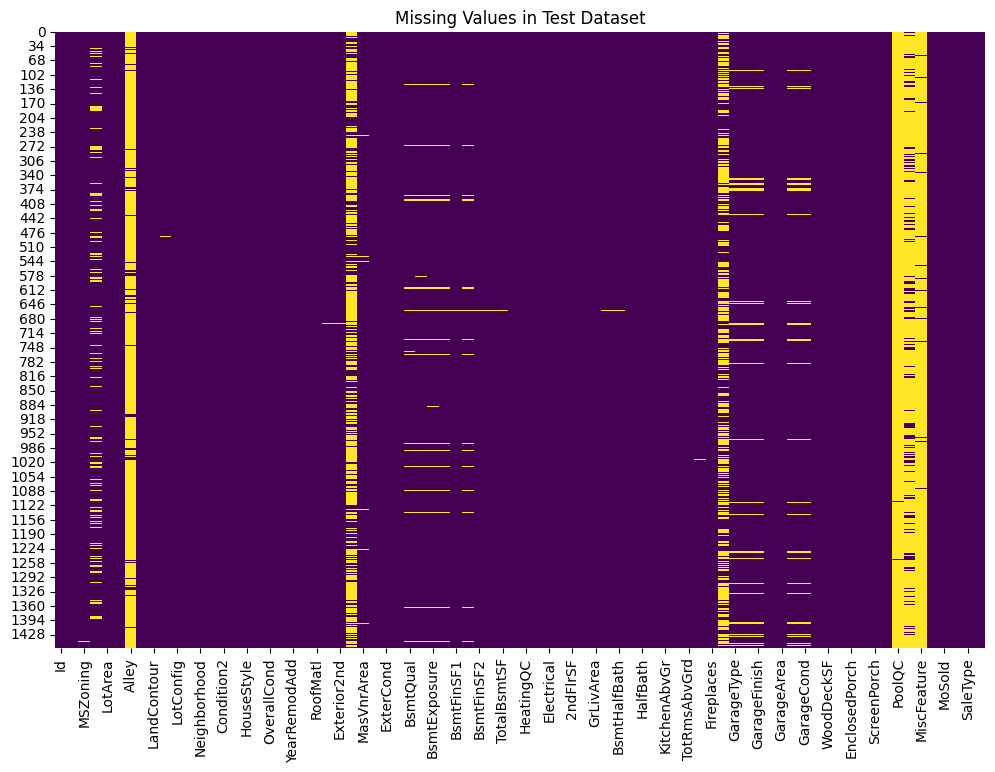

In [54]:
import seaborn as sns

# Train missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Train Dataset")
plt.show()

# Test missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Test Dataset")
plt.show()


In [55]:
# Descriptive statistics for train dataset
print("Train Dataset Summary Statistics:\n", train_df.describe())

# Descriptive statistics for test dataset
print("Test Dataset Summary Statistics:\n", test_df.describe())


Train Dataset Summary Statistics:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.6

In [57]:
# Select only numeric columns for correlation matrix
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()



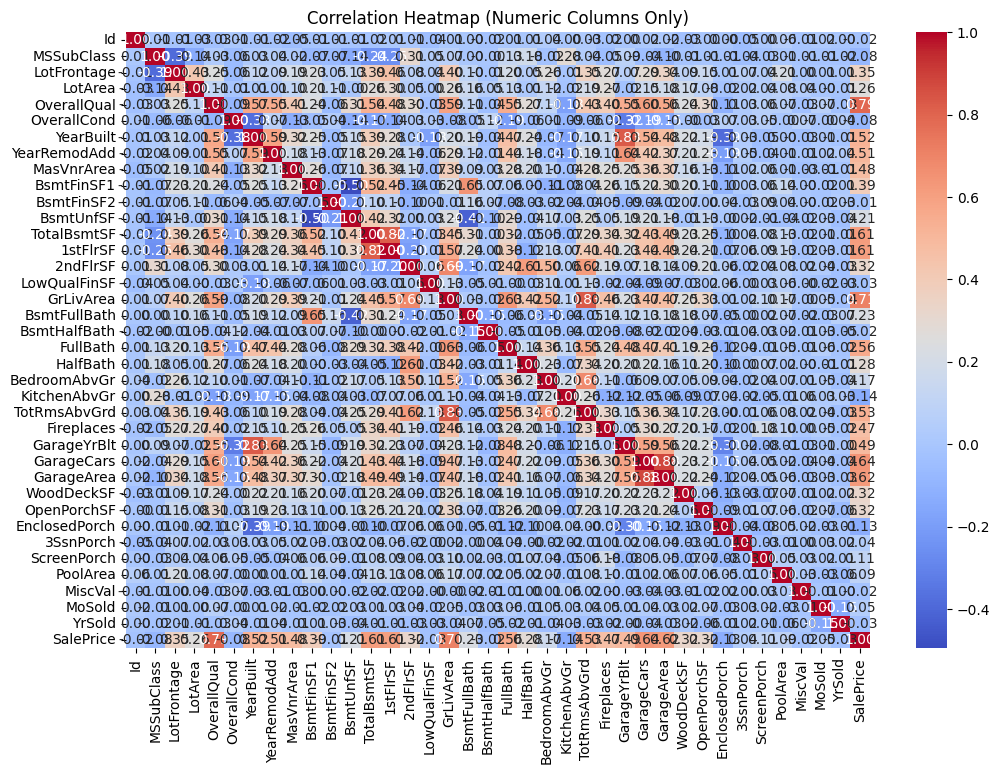

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


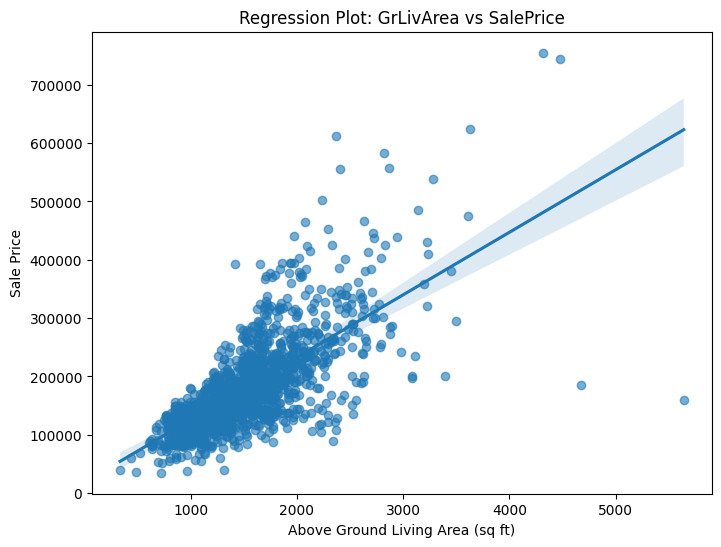

In [59]:
# Regression plot for GrLivArea and SalePrice
plt.figure(figsize=(8, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, scatter_kws={'alpha':0.6})
plt.title("Regression Plot: GrLivArea vs SalePrice")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


In [60]:
# Calculate Pearson correlation and p-value
feature = 'GrLivArea'
target = 'SalePrice'
pearson_corr, p_value = pearsonr(train_df[feature], train_df[target])
print(f"Pearson Correlation Coefficient ({feature} vs {target}): {pearson_corr}")
print(f"P-Value: {p_value}")


Pearson Correlation Coefficient (GrLivArea vs SalePrice): 0.7086244776126522
P-Value: 4.518033646776417e-223


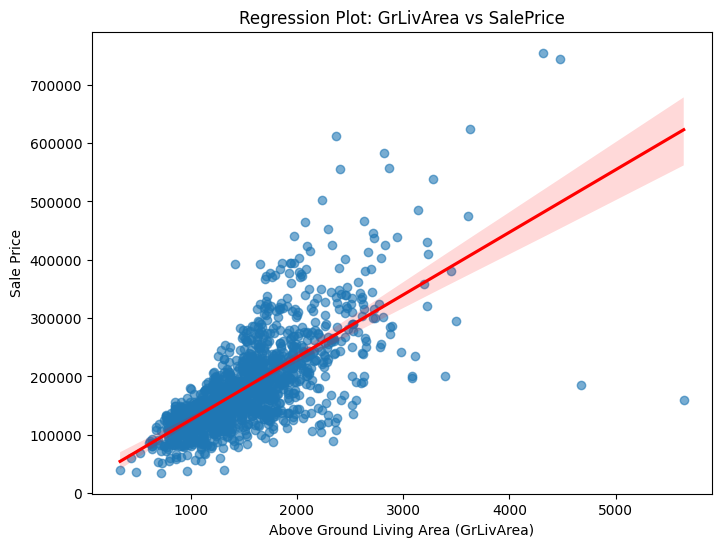

(0.7086244776126522, 4.518033646776417e-223)

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Regression plot: GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title("Regression Plot: GrLivArea vs SalePrice")
plt.xlabel("Above Ground Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.show()

# Calculate Pearson Correlation Coefficient and P-value
feature = 'GrLivArea'
target = 'SalePrice'
pearson_corr, p_value = pearsonr(train_df[feature], train_df[target])

# Print the results
(pearson_corr, p_value)
